In [ ]:
# Upload PretrainedModel.zip and execute this command to use the models

!unzip /content/PretrainedModels.zip > /dev/null

#<b><font face = "Times New Roman" size = "7" color= "499ab2">Autoencoders</font></b>

##<b><font face = "Times New Roman" size = "6" color= "5bc0de">1. Introduction</font></b>

> <font face = "Times New Roman" size = "5"> The following situation might seem familiar to you: You are having a fun night out with your friends and you want to capture this situation on camera. Hence, you take some photos of you and your friends, but as it is dark outside every photo has noise in it. As annoying as that is, there are actually tools to decrease noise in images. This notebook will present you an artificial intelligence tool that is capable of doing so: the autoencoder. </br>
In this notebook you will learn what an autoencoder is, what it can do and cannot do and how you can use and build one yourself. This notebook hopefully also enables you to learn and understand other AI-techniques as well as to critically question modern phenomena like Chat-GPT or other popular AI-models. So let us start by clarifying the question: What are autoencoders?
 </font>



##<b><font face = "Times New Roman" size = "6" color= "5bc0de">2. What are Autoencoders?</font></b>

> <font face = "Times New Roman" size = "5">To clarify what an autoencoder actually is, let us start with a quick definition: </br><i>
“An autoencoder is a neural network that is trained to attempt to copy its input to its output.”</i> [1]</br>
This definition can be split into two parts. First of all, autoencoders are neural networks meaning that they are some kind of combination of perceptron layers. These layers of perceptrons, which are kind of the brain cells of our network, are connected through weights. These weights will be the parameters we will train so that our network is able to learn something. </br>
That is where the second part of our definition comes into play. In our case the autoencoder is trained how to properly copy its input to its output. You might ask yourself: What is the benefit of doing so if we already have the input? This is a valid question. The answer to that is, that we are not actually interested in the output but rather in everything that happens between the input and the output layer. Therefore, let us look more closely into the structure of an autoencoder.
</font>

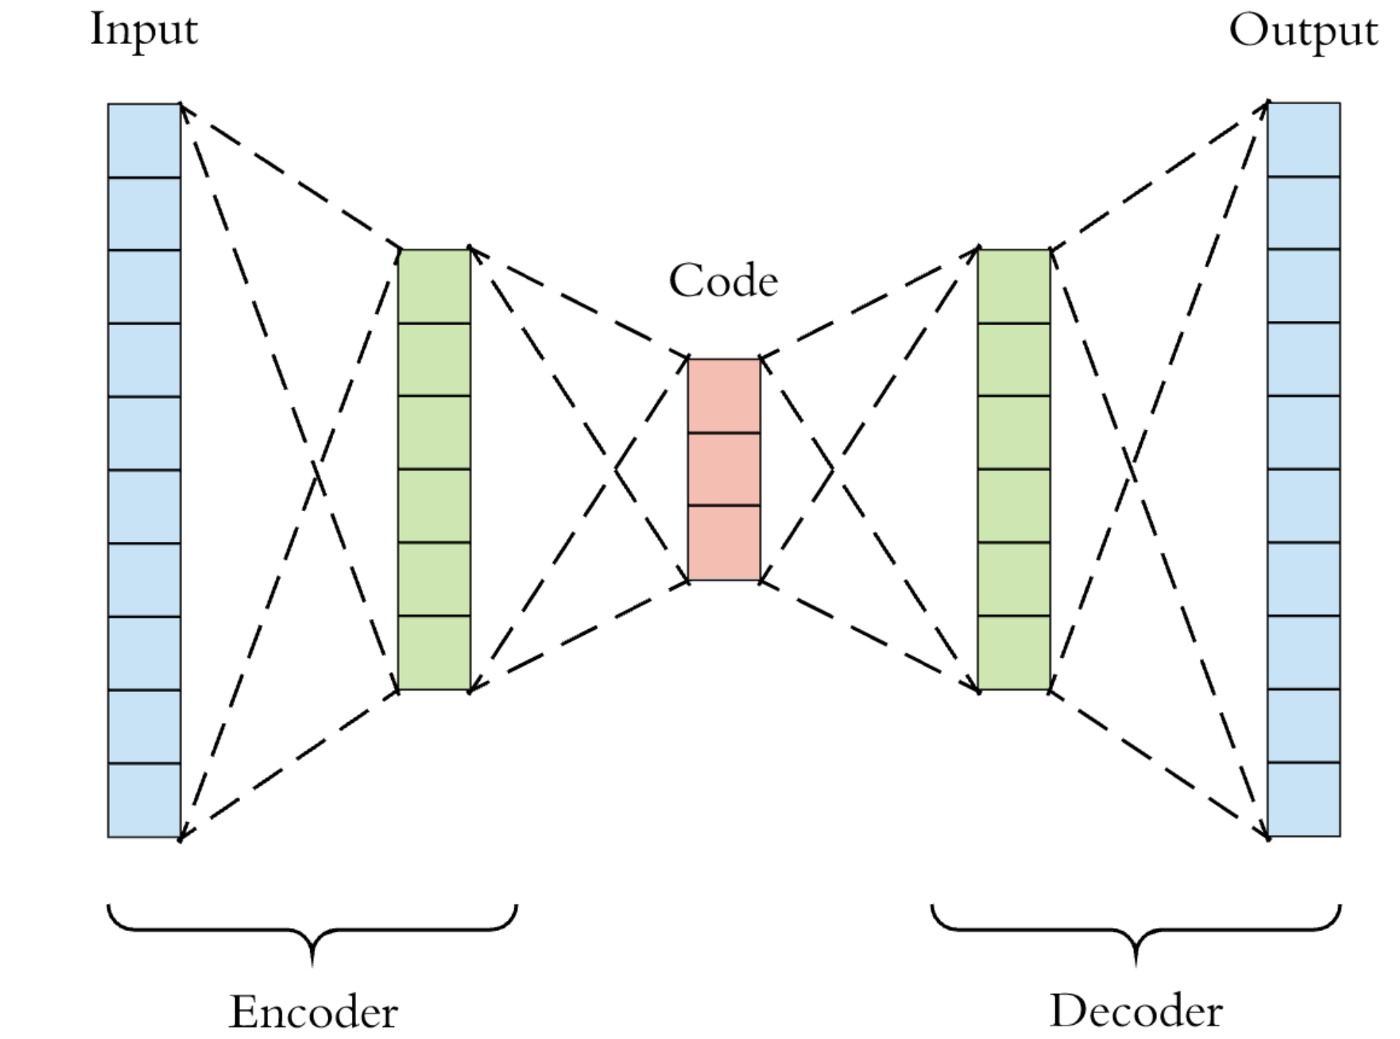
Fig. 1: Structure of an autoencoder [2]

> <font face = "Times New Roman" size = "5">Fig. 1 depicts a possible structure of an autoencoder. As you can see, our input layer, which consists of ten perceptrons is connected to a hidden layer with less perceptrons, in fact only six perceptrons. The layer after that is even smaller with three perceptrons. From that point on the layers are getting bigger again until we reach the output layer. The output layer has to be the same size as the input layer since we are training the autoencoder to exactly recreate the output from the input. The interesting thing about this kind of structure is that the layers between the output and the input layers are smaller and therefore can hold less information. So at some point in time the autoencoder is forced to learn some kind of lower dimensional representation which has to hold the same kind of information as the input layer in order to reconstruct the output later on. [3] This procedure, which is somehow derivated from the natural structure of an autoencoder, is called dimensionality reduction.
</font>

## <b><font face = "Times New Roman" size = "6" color = "5bc0de">3. Dimensionality Reduction</font></b>

> <font face = "Times New Roman" size = "5">The process of dimensionality reduction is an unsupervised learning procedure. This means that the neural network is not trying to match input data to some human made labels like fish or dog (supervised learning) but instead learns its representation of the world by extracting important information from the input data. </br>
<i>“You can think of labels as a teacher. A teacher tells the learner that x corresponds to y and the learner attempts to learn the relationship between x and y iteratively by trial and error, adjusting its beliefs (parameters) until it gets it right. However, if there is no teacher, the learner does not know anything about the label and therefore learns something about by x itself, provided some boundaries, and it forms its own beliefs about x without ever knowing anything about y.”</i> [3] </br>
The boundaries we will give the neural network are the decreasing sizes of hidden layers so that the network is forced to learn lower dimensional representations of the data and therefore has to extract the most important information. The lowest dimensional representation is called latent space or code. Everything from the input to the latent space is called an encoder. And everything from the latent space to the output is called a decoder.
</font>





###<font face = "Times New Roman" size = "6" color = "ade0ef">3.1 Dimensionality Reduction on an Array</font>

> <font face = "Times New Roman" size = "5">Now that we have clarified the theoretical basics behind autoencoders let us start getting practical. Before we can do some dimensionality reduction, first of all we have to setup an autoencoder. Therefore, we will use the Keras-Framework. As you can see in the code below our autoencoder will have an input layer of size 8 and we will reduce the information until it is only of size 2. The whole autoencoder now consists of 7 layers: the input layer, the output layer, the latent space as well as 4 more hidden layers to increase the ability of learning complex functions. 
</font>

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Input dimension of 8 for our array of size 8
inpt_dim = 8

# Latent Space of size 2
ltnt_dim = 2 

# Shaping the encoder
inpt_vec = Input(shape=(inpt_dim,))
elayer1 = Dense(6, activation='sigmoid')(inpt_vec)
elayer2 = Dense(4, activation='sigmoid') (elayer1)
encoder = Dense(ltnt_dim, activation='sigmoid') (elayer2)

latent_ncdr = Model(inpt_vec, encoder)
# Shaping the decoder
dlayer1 = Dense(4, activation='sigmoid')(encoder)
dlayer2 = Dense(6, activation='sigmoid') (dlayer1)
decoder = Dense(inpt_dim, activation='sigmoid') (dlayer2)


# full Autoencoder
autoencoder = Model(inpt_vec, decoder)
autoencoder.compile(loss='mean_squared_error', optimizer='sgd')

# Code by Pablo Rivas [3] edited by Ole Dziewas

> <font face = "Times New Roman" size = "5">The next code section will train the autoencoder with a single record namely an array of size 8. Since we have such a small dataset to train on, we will do 10,000 epochs of training to increase the performance. After executing the code cell you should see the learned latent space representation, the reconstructed output as well as the mean squared error (MSE). 
</font>

In [ ]:
# Takes around 30sec to execute

import numpy as np
# Trainingdata
x = np.array([[0., 0., 1., 0., 0., 1., 1., 1.]])

# Start training of the autoencoder
hist = autoencoder.fit(x, x, epochs=10000, verbose=0)
history = hist.history
# Create the two dimensional representation of array x
encdd = latent_ncdr.predict(x)

# Create the output which should be as close as possible to x
x_hat = autoencoder.predict(x)

# Check training results
print("Latent Space Representation: ", encdd)
print("Output: ", x_hat)
print("MSE: ", np.mean(np.square(x-x_hat)))  # MSE - Mean Squared Error

# Code by Pablo Rivas [3] edited by Ole Dziewas

1/1 [==============================] - 0s 76ms/step
Latent Space Representation:  [[0.5147313 0.146276 ]]
Output:  [[0.08409957 0.09670806 0.90337956 0.08455792 0.09181254 0.90620553
  0.9222357  0.9096882 ]]
MSE:  0.008042648621721417


> <font face = "Times New Roman" size = "5"> The latent space representation should now be a two-dimensional array. The numbers that it contains are describing the information that the input contained in compressed form. At this point it is pretty difficult to interpret the exact meaning of the numbers, but we will come back to interpreting the latent space later. If we now look at the output, we can see that it did a pretty good job at reconstructing the input. It is not perfect but every value that was 0 before is now close to 0 and every 1 input is nearly a 1 in the output too. The difference between input and output is also described in the MSE which is nearly 0. That means that we have only a very small difference. Now try reconstructing a different array by executing the next code section. </font>

In [ ]:
# Testing on another array

y = np.array([[1., 1., 1., 0., 0., 0., 1., 0.]])
encdd = latent_ncdr.predict(x)
y_hat = autoencoder.predict(x)

# Check test results
print("Latent Space Representation: ",encdd)
print("Output: ", y_hat)
print("MSE: ", np.mean(np.square(y-y_hat)))  # MSE

# Code by Pablo Rivas [3] edited by Ole Dziewas

1/1 [==============================] - 0s 33ms/step
Latent Space Representation:  [[0.5147313 0.146276 ]]
Output:  [[0.08409957 0.09670806 0.90337956 0.08455792 0.09181254 0.90620553
  0.9222357  0.9096882 ]]
MSE:  0.416814169102235


> <font face = "Times New Roman" size = "5"> As you can see in the output as well as in the large MSE the reconstruction of a different array went pretty badly. The reason for that is the small dataset and a specific attribute of neural networks namely the bad performance on unknown data. Since we only used one single point of data for training, the autoencoder is only able to reconstruct this specific data record. No matter which array we input it will always output an array very similar to the one we have trained it on. [1] This attribute is very important and you should remember when using neural networks and specifically autoencoders. In the next sections we will use a lot more complex datasets like MNIST and CIFAR10 to show the performance on more realistic application of autoencoders. The performance (overall error) will be depicted like in the following plot you can create by running the next code cell. In this plot the average error after a certain time of training is depicted. </font>

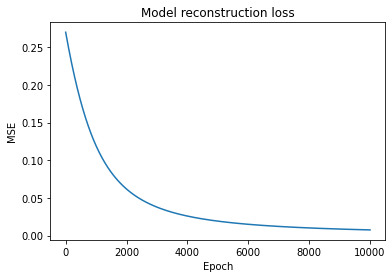

In [ ]:
import matplotlib.pyplot as plt

# Plot the overall error during training
plt.plot(history['loss'])
plt.title('Model reconstruction loss')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

# Code by Pablo Rivas [3] edited by Ole Dziewas

###<font face = "Times New Roman" size = "6" color = "ade0ef">3.2 Dimensionality Reduction on the MNIST dataset</font>

> <font face = "Times New Roman" size = "5"> The MNIST dataset is a collection of hand-written numbers in a 28 by 28 pixel format. To make them usable for our autoencoder we turn them into a vector of size 784 and map their brightness values from [0, 255] to [0, 1]. </font>

In [ ]:
from tensorflow.keras.datasets import mnist

# Loading the MNIST-dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Changing the brightness values range from [0, 255] to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshaping the 28 by 28 images into a vector of size 784
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))
print(x_train.shape)
print(x_test.shape)

# Code by Pablo Rivas [3] edited by Ole Dziewas

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


> <font face = "Times New Roman" size = "5">This much more fitting data will now be fed into the autoencoder you can see in the next code section. Since our data is now of size 784, we also need an input layer of the same size. Now we follow the typical structure of an autoencoder by decreasing the layer sizes until we reach our latent space of size 2. And then we go up again in size until we reach the output layer.  </font>

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import pickle

# Dimensionality of input and latent encoded representations
inpt_dim = 28*28
ltnt_dim = 2  

inpt_vec = Input(shape=(inpt_dim,))
elayer1 = Dense(392,        activation='sigmoid')(inpt_vec)
elayer2 = Dense(28,        activation='sigmoid') (elayer1)
elayer3 = Dense(10,        activation='sigmoid') (elayer2)
encoder = Dense(ltnt_dim, activation='tanh') (elayer3)

# Model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

dlayer1 = Dense(10,        activation='sigmoid')(encoder)
dlayer2 = Dense(28,        activation='sigmoid')(dlayer1)
dlayer3 = Dense(392,        activation='sigmoid')(dlayer2)
decoder = Dense(inpt_dim, activation='sigmoid') (dlayer3)

# Model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
'''#---- Own Training and Saving of the Model
# Start training of the model
hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, 
                       shuffle=True, validation_data=(x_test, x_test))
history = hist.history

#-----------SAVING-THE-MODELS---------------#
with open('PretrainedModels/AE_History_MNIST_DR_HISTORY', 'wb') as file_pi:
    pickle.dump(hist.history, file_pi)
latent_ncdr.save('PretrainedModels/LatentSpaceModel_MNIST_DR')
autoencoder.save('PretrainedModels/Autoencoder_MNIST_DR')
'''
# Code by Pablo Rivas [3] edited by Ole Dziewas

"#---- Own Training and Saving of the Model\n# Start training of the model\nhist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, \n                       shuffle=True, validation_data=(x_test, x_test))\nhistory = hist.history\n\n#-----------SAVING-THE-MODELS---------------#\nwith open('PretrainedModels/AE_History_MNIST_DR_HISTORY', 'wb') as file_pi:\n    pickle.dump(hist.history, file_pi)\nlatent_ncdr.save('PretrainedModels/LatentSpaceModel_MNIST_DR')\nautoencoder.save('PretrainedModels/Autoencoder_MNIST_DR')\n"

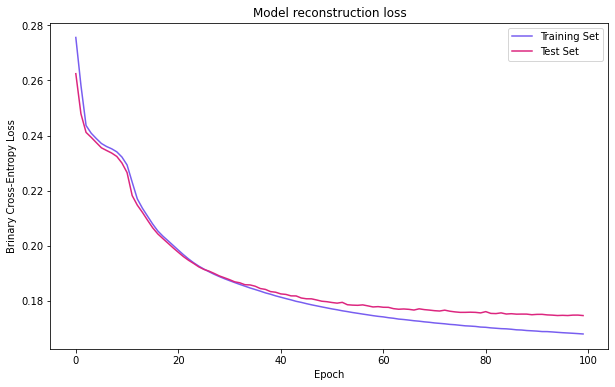

In [ ]:
import matplotlib.pyplot as plt

#---------LOADING-THE-HISTORY----------#
with open('/content/PretrainedModels/AE_History_MNIST_DR_HISTORY', 'rb') as file_pi:
    history = pickle.load(file_pi)
#---------------------------------------#


# Plotting the error on test and training data during epochs of training
fig = plt.figure(figsize=(10,6))
plt.plot(history['loss'], color='#785ef0')
plt.plot(history['val_loss'], color='#dc267f')
plt.title('Model reconstruction loss')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.show()

# Code by Pablo Rivas [3] edited by Ole Dziewas

> <font face = "Times New Roman" size = "5">After a training time of 100 epochs our error decreased to a value of 0.17. If you look at that value, you will recognize that this error is much larger than the error we had while working with a single array. That is because it is obviously much harder to represent the information of a vector of size 784 in a two-dimensional latent space than of a vector of size 8. But to give this value a little bit more meaning let us compare the input to the output by just plotting the original images and the reconstructed ones.</font>

313/313 [==============================] - 2s 5ms/step


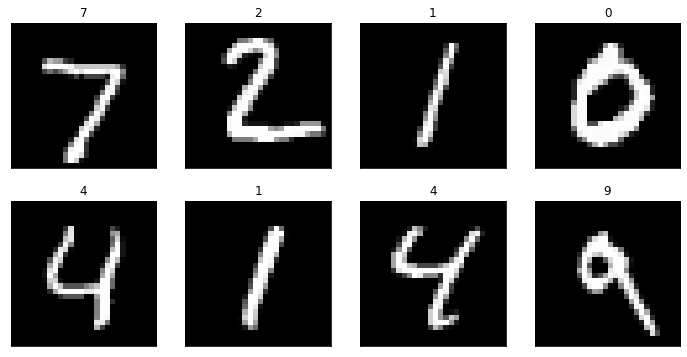

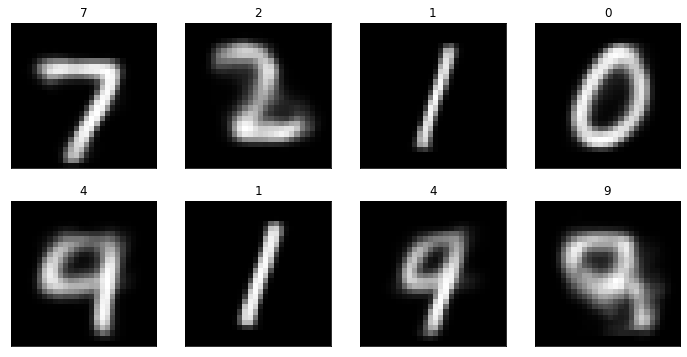

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

#---------LOADING-THE-MODELS----------#
latent_ncdr = keras.models.load_model('PretrainedModels/LatentSpaceModel_MNIST_DR')
autoencoder = keras.models.load_model('PretrainedModels/Autoencoder_MNIST_DR')
#-------------------------------------#

# Create two dimensional representations of the test data
encdd = latent_ncdr.predict(x_test)

# Create the predicted output for each test data input
x_hat = autoencoder.predict(x_test)

# Plot the first eight original images
plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_test[0:8].reshape(8, 28, 28), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.show()

# Plot the first eight reconstructed images
plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[0:8].reshape(8, 28, 28), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.show()

# Code by Pablo Rivas [3] edited by Ole Dziewas

> <font face = "Times New Roman" size = "5">Despite the high calculated error, the results actually look very good. On the one hand numbers like 0, 1 and 7 are reconstructed very well. On the other hand, numbers like 4 and 9 are reconstructed in a very blurry way looking like some kind of combination between each other. To get a better understanding of this phenomenon let us have a look into the latent space of the autoencoder.</font>

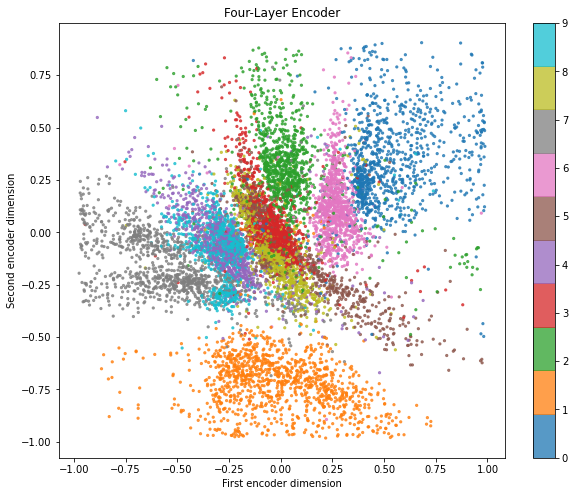

In [ ]:
import matplotlib.pyplot as plt

y_ = list(map(int, y_test))
X_ = encdd

# Plot the latent space representations colored by labels of the test data
plt.figure(figsize=(10,8))
plt.title('Four-Layer Encoder')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('First encoder dimension')
plt.ylabel('Second encoder dimension')
plt.colorbar()

# Code by Pablo Rivas [3] edited by Ole Dziewas

> <font face = "Times New Roman" size = "5">As to be seen in this graphic every data point is getting matched to some location in the two-dimensional space. Similar looking images or numbers have much less distance to each other while more differing numbers are further away in space. This leads to a formation of data clusters. Numbers which were reconstructed very well are in separated clusters with clear borders where no other data points are interfering. But numbers which were reconstructed poorly like 4 and 9 have overlapping clusters because of their similarity. [3] That is why the autoencoder often just generates a fusion of both. But still, all in all the results are pretty impressive for the amount of data reduced. Since the latent space is only 0,2% of the size of the original data meaning, we could for example reduce 1 Mb of data to 2 kb of data.</font>

###<font face = "Times New Roman" size = "6" color = "ade0ef">3.3 Dimensionality Reduction the CIFAR dataset</font>

> <font face = "Times New Roman" size = "5">When doing the same things we did on MNIST with the much more complex CIFAR10 dataset we will see that there are limits to the performance of autoencoders. </font>

170498071/170498071 [==============================] - 4s 0us/step


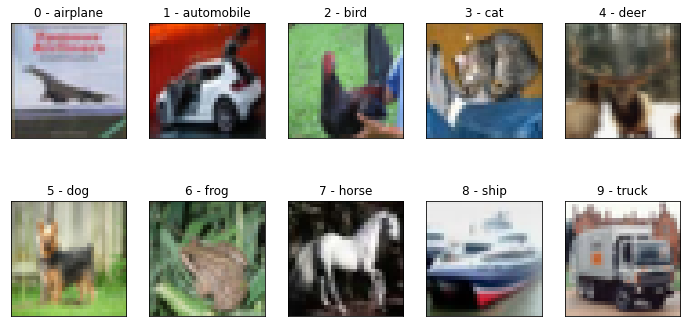

In [ ]:
#Visualizing the Data
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

#Plotting 10 images of the CIFAR10-dataset
idx = [3, 6, 25, 0, 26, 24, 4, 13, 1, 11]
clsmap = {0: '0 - airplane',
          1: '1 - automobile', 
          2: '2 - bird', 
          3: '3 - cat', 
          4: '4 - deer',
          5: '5 - dog',
          6: '6 - frog',
          7: '7 - horse',
          8: '8 - ship',
          9: '9 - truck'}
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_test[idx].reshape(10, 32, 32, 3), y_test[idx])):
  plt.subplot(2, 5, 1 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(clsmap[y[0]])
plt.show()

# Code by Pablo Rivas [3] edited by Ole Dziewas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Input dimension of a 32 by 32 image width color values (3 values for rgb)
inpt_dim = 32*32*3

# Latent space of size 64
ltnt_dim = 64

# Load the data and transfrom it the same way as the MNIST-dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

# Code by Pablo Rivas [3] edited by Ole Dziewas

x_train shape: (50000, 3072)
x_test shape: (10000, 3072)


In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.layers import BatchNormalization

# Create a Deep Autoencoder with Dropout and Batch Normalization Layers
# Encoder
inpt_vec = Input(shape=(inpt_dim,))
el1 = Dense(2048)(inpt_vec)
el2 = Activation('relu')(el1)
el3 = Dense(1024)(el2)
el4 = BatchNormalization()(el3)
el5 = Activation('relu')(el4)
el6 = Dropout(0.2)(el5)

el7 = Dense(512)(el6)
el8 = Activation('relu')(el7)
el9 = Dense(256)(el8)
el10 = BatchNormalization()(el9)
el11 = Activation('relu')(el10)
el12 = Dropout(0.2)(el11)

el13 = Dense(128)(el12)
el14 = Activation('relu')(el13)
el15 = Dropout(0.2)(el14)
el16 = Dense(ltnt_dim)(el15)
el17 = BatchNormalization()(el16)
encoder = Activation('tanh')(el17)

# Decoder
dl1 = Dense(128)(encoder)
dl2 = BatchNormalization()(dl1)
dl3 = Activation('relu')(dl2)

dl4 = Dropout(0.2)(dl3)
dl5 = Dense(256)(dl4)
dl6 = Activation('relu')(dl5)
dl7 = Dense(512)(dl6)
dl8 = BatchNormalization()(dl7)
dl9 = Activation('relu')(dl8)

dl10 = Dropout(0.2)(dl9)
dl11 = Dense(1024)(dl10)
dl12 = Activation('relu')(dl11)
dl13 = Dense(2048)(dl12)
dl14 = BatchNormalization()(dl13)
dl15 = Activation('relu')(dl14)
decoder = Dense(inpt_dim, activation='sigmoid') (dl15)

# Code by Pablo Rivas [3] edited by Ole Dziewas

In [ ]:
# Model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

# Setup RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6, )

autoencoder.compile(loss='binary_crossentropy', optimizer=opt)
'''
hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=10000, 
                       shuffle=True, validation_data=(x_test, x_test))
history = hist.history

#-----------SAVING-THE-MODELS---------------#
with open('PretrainedModels/AE_History_CIFAR_DR_HISTORY', 'wb') as file_pi:
    pickle.dump(hist.history, file_pi)
autoencoder.save('PretrainedModels/Autoencoder_CIFAR_DR')
'''

"\nhist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=10000, \n                       shuffle=True, validation_data=(x_test, x_test))\nhistory = hist.history\n\n#-----------SAVING-THE-MODELS---------------#\nwith open('PretrainedModels/AE_History_CIFAR_DR_HISTORY', 'wb') as file_pi:\n    pickle.dump(hist.history, file_pi)\nautoencoder.save('PretrainedModels/Autoencoder_CIFAR_DR')\n"

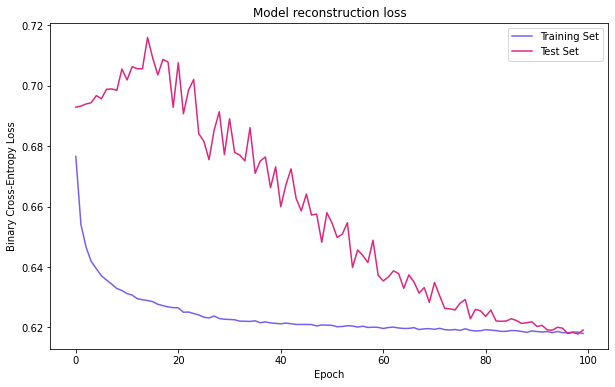

In [ ]:
import matplotlib.pyplot as plt


#---------LOADING-THE-HISTORY----------#
with open('/content/PretrainedModels/AE_History_CIFAR_DR_HISTORY', 'rb') as file_pi:
    history = pickle.load(file_pi)
#---------------------------------------#


# Plot of the losses during the epochs of training 
fig = plt.figure(figsize=(10,6))
plt.plot(history['loss'], color='#785ef0')
plt.plot(history['val_loss'], color='#dc267f')
plt.title('Model reconstruction loss')
plt.ylabel('Binary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.show()

# Code by Pablo Rivas [3] edited by Ole Dziewas

313/313 [==============================] - 17s 54ms/step


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


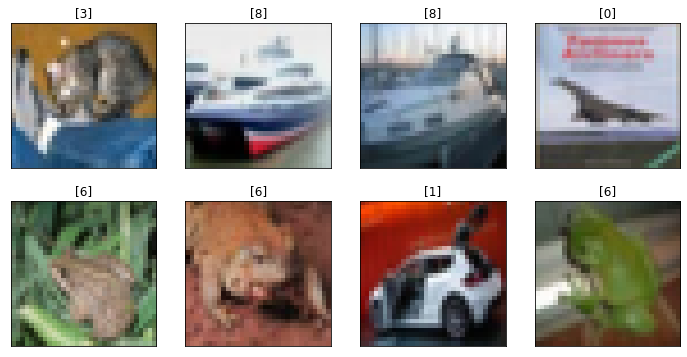

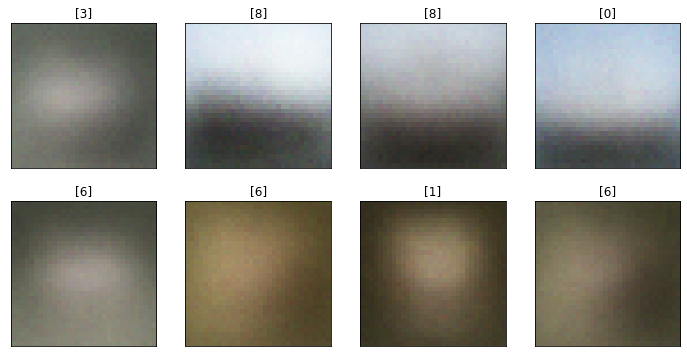

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#---------LOADING-THE-MODELS----------#
autoencoder = keras.models.load_model('PretrainedModels/Autoencoder_CIFAR_DR')
#-------------------------------------#

# Reconstruct images
x_hat = autoencoder.predict(x_test)

# Plot original images
plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_test[0:8].reshape(8, 32, 32, 3), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.show()

# Plot reconstructed images
plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[0:8].reshape(8, 32, 32, 3), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.show()

# Code by Pablo Rivas [3] edited by Ole Dziewas

> <font face = "Times New Roman" size = "5">Even when using a much better architecture with more layers and additional techniques like dropout and batch normalization. We cannot reduce the error to less than 0.62, even after 100 epochs of training. If we now look at the reconstructed images, the results are not even slightly recognisable. The only thing that the autoencoder managed in some way was to recreate the colour scheme. These results do not mean that autoencoders are useless on complex data, they only need a lot more time and computational power to train them as well as larger and more refined datasets. [1] </br> 
But what now? Like many other techniques in the area of artificial intelligence autoencoders are not only used for the purpose they were designed for in the first place. That is why we will look into two other areas where autoencoders are used: image denoising and anomaly detection.
 </font>


##<b><font face = "Times New Roman" size = "6" color = "5bc0de">4. Image Denoising</font></b>

> <font face = "Times New Roman" size = "5">Images are often inflicted with noise due to various sources like low illumination levels or heat. Autoencoders allow us to heavily increase the image quality through image denoising. The process of image denoising is actually pretty similar to the process of dimensionality reduction. The only things that are different are the input data, which are now noised images, and the desired output, which is no longer the recreated input, but the cleaned data. [4] So, to be able to train the autoencoder you need noised images as well as their clean counterpart. </br>
In this scenario we will take the MNIST-dataset as the clean data and we will manually add noise to them to visualize the procedure. You can take a look at some of the noised images after executing the following code section.

 </font>

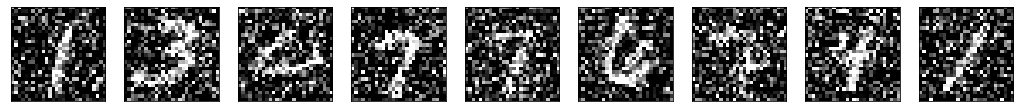

In [ ]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Get MNIST images, clean and with noise
def get_mnist(noise_factor=0.5):
  # Load MNIST data
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  # Transform data in fitting input shape
  x_train = x_train.astype('float32') / 255.
  x_test = x_test.astype('float32') / 255.
  x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
  x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

  # Add noise to data
  x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
  x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

  x_train_noisy = np.clip(x_train_noisy, 0., 1.)
  x_test_noisy = np.clip(x_test_noisy, 0., 1.)
  
  return x_train, x_test, x_train_noisy, x_test_noisy, y_train, y_test

# Setup up clean and noised data
x_train, x_test, x_train_noisy, x_test_noisy, y_train, y_test = get_mnist()

# Plot n random digits
# Use labels to specify which digits to plot
def plot_mnist(x, y, n=10, randomly=False, labels=[]):
  plt.figure(figsize=(20, 2))
  if len(labels)>0:
    x = x[np.isin(y, labels)]
  for i in range(1,n,1):
      ax = plt.subplot(1, n, i)
      if randomly:
        j = random.randint(0,x.shape[0])
      else:
        j = i
      plt.imshow(x[j].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

# Get a look on the random examples of noised data
plot_mnist(x_test_noisy, y_test, randomly=True)

# Code by Michel Kana [5] edited by Ole Dziewas

> <font face = "Times New Roman" size = "5">Now that we have prepared the data, let us start training the model so that our output matches the clean versions.

 </font>

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import pickle

# Dimensionality of input and latent encoded representations
inpt_dim = 28*28
ltnt_dim = 2  

inpt_vec = Input(shape=(inpt_dim,))
elayer1 = Dense(392,        activation='sigmoid')(inpt_vec)
elayer2 = Dense(28,        activation='sigmoid') (elayer1)
elayer3 = Dense(10,        activation='sigmoid') (elayer2)
encoder = Dense(ltnt_dim, activation='tanh') (elayer3)

# Model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

dlayer1 = Dense(10,        activation='sigmoid')(encoder)
dlayer2 = Dense(28,        activation='sigmoid')(dlayer1)
dlayer3 = Dense(392,        activation='sigmoid')(dlayer2)
decoder = Dense(inpt_dim, activation='sigmoid') (dlayer3)

# Model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Code by Michel  Kana [5] edited by Ole Dziewas

In [ ]:
# Flatten the 28x28 images into vectors of size 784.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train_noisy = x_train_noisy.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))
x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))
'''#---- Own Training and Saving of the Model
# Training
hist = autoencoder.fit(x_train_noisy, x_train,
                          epochs=100,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))
history = hist.history 

#-----------SAVING-THE-MODELS---------------#
with open('PretrainedModels/AE_History_MNIST_ID_HISTORY', 'wb') as file_pi:
    pickle.dump(hist.history, file_pi)
autoencoder.save('PretrainedModels/Autoencoder_MNIST_ID')
'''
# Code by Michel Kana [5] edited by Ole Dziewas

"#---- Own Training and Saving of the Model\n# Training\nhist = autoencoder.fit(x_train_noisy, x_train,\n                          epochs=100,\n                          batch_size=128,\n                          shuffle=True,\n                          validation_data=(x_test_noisy, x_test))\nhistory = hist.history \n\n#-----------SAVING-THE-MODELS---------------#\nwith open('PretrainedModels/AE_History_MNIST_ID_HISTORY', 'wb') as file_pi:\n    pickle.dump(hist.history, file_pi)\nautoencoder.save('PretrainedModels/Autoencoder_MNIST_ID')\n"

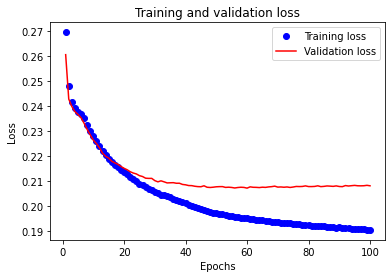

In [ ]:

#---------LOADING-THE-HISTORY----------#
with open('/content/PretrainedModels/AE_History_MNIST_ID_HISTORY', 'rb') as file_pi:
    history = pickle.load(file_pi)
#---------------------------------------#


# Plot training performance
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Code by Michel Kana [5] edited by Ole Dziewas

> <font face = "Times New Roman" size = "5">After 100 epochs of training we actually get some quite promising results. With an error of only 0.19 we are close to the error we had on dimensionality reduction with MNIST.
 </font>

313/313 [==============================] - 2s 6ms/step


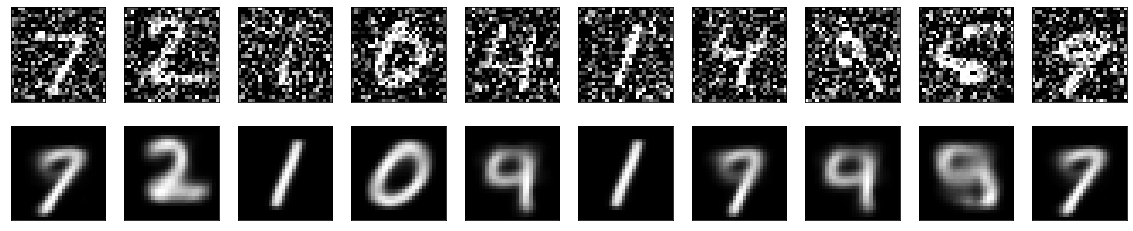

In [ ]:

#---------LOADING-THE-MODELS----------#
autoencoder = keras.models.load_model('PretrainedModels/Autoencoder_MNIST_ID')
#-------------------------------------#


# Plot de-noised images
def plot_mnist_predict(x_test, x_test_noisy, autoencoder, y_test, labels=[]):
  
  if len(labels)>0:
    x_test = x_test[np.isin(y_test, labels)]
    x_test_noisy = x_test_noisy[np.isin(y_test, labels)]

  # Predict the cleaned images
  decoded_imgs = autoencoder.predict(x_test)
  n = 10 

  # Plot the first 10 noised and clean images 
  plt.figure(figsize=(20, 4))
  for i in range(n):
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test_noisy[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(decoded_imgs[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()
  return decoded_imgs, x_test
 
decoded_imgs_test, x_test_new = plot_mnist_predict(x_test, x_test_noisy, autoencoder, y_test)

# Code by Michel Kana [5] edited by Ole Dziewas

> <font face = "Times New Roman" size = "5">When we now plot the reconstructed images, we can see that most of the noise was removed and that most of the numbers were very well recreated. Because of the good performance of autoencoders in image denoising they can in fact be used to clean for example medical images like x-rays. [6]
 </font>

##<b><font face = "Times New Roman" size = "6" color = "5bc0de">5. Anomaly Detection</font></b>

> </a><font face = "Times New Roman" size = "5">Another great thing we can do with autoencoders is anomaly detection. To do that we turn a weakness of the autoencoder into a strength. As it was mentioned earlier on in the chapter of dimensionality reduction, autoencoders perform very poorly on unknown data. The idea behind anomaly detection is to use that behaviour since anomalies are typically deviations of the norm. They are therefore unknown to the autoencoder if we train it with data that arises within the norm. [7] </br>
For visualization purposes we will again use the MNIST-dataset to train the autoencoder with our “normal” data. When we now input an anomaly in our case that would be a noised image, the autoencoder will not be able to recreate the noise since noise never occurred in the original MNIST data. The error (the difference) between the input and the output will now be very large. To now identify anomalies we only have to look at the images which create an error over a certain threshold.
<font>

In [ ]:
#---------LOADING-THE-MODELS----------#
autoencoder = keras.models.load_model('PretrainedModels/Autoencoder_MNIST_DR')
#-------------------------------------#

1/1 [==============================] - 0s 112ms/step
testdata:


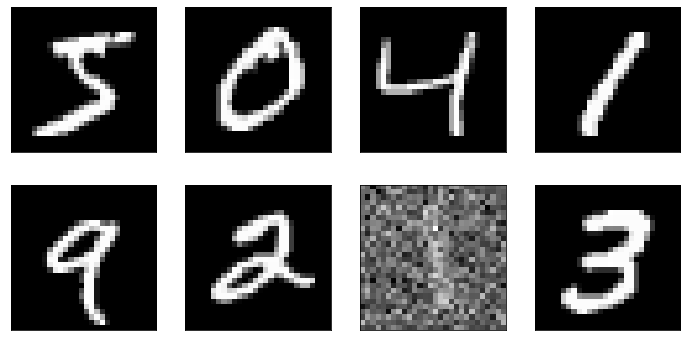



Reconstructed data:


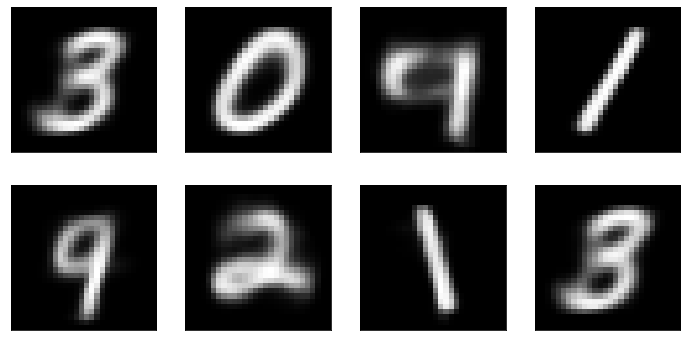



Das am schlechtesten rekonstruierte Bild ist an Stelle:  7


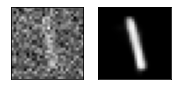

In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy
import copy
import random

# Load MNIST-Data
(x_main_train, y_main_train), (x_main_test, y_main_test) = mnist.load_data()

def create_anomaly(noise = 0.5):
  # Reload data
  x_test = copy.deepcopy(x_main_train)
  y_test = copy.deepcopy(x_main_train)
  x_test = x_test.astype('float32') / 255.
  x_test = x_test.reshape((len(x_test), 28*28))

  # Create noised data on random image
  ri = random.randint(0,7)
  x_test_noisy = x_test[ri] + noise * numpy.random.normal(loc=0.0, scale=1.0, size=x_test[ri].shape)
  x_test[ri] = x_test_noisy
  return x_test

# Create an anomaly by noising one image
x_test = create_anomaly()

# Predicting output and calculating loss
x_hat = autoencoder.predict(x_test[0:8])
prediction_loss = keras.losses.mae(x_hat, x_test[0:8])

# Get image with largest loss
prediction_loss = prediction_loss.numpy()
max_index = numpy.argmax(prediction_loss)

# Plot testdata
print("testdata:")
plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_test[0:8].reshape(8, 28, 28), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  if(i == max_index):
    anomaly_img = img
  plt.xticks([])
  plt.yticks([])
plt.show()

# Plot reconstructed data
print("\n\nReconstructed data:")
plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[0:8].reshape(8, 28, 28), y_test[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  if (i == max_index):
    max_img = img
  plt.xticks([])
  plt.yticks([])
plt.show()

# Plot pair of data with largest loss
print("\n\nDas am schlechtesten rekonstruierte Bild ist an Stelle: ", max_index+1)
plt.subplot(241)
plt.imshow(anomaly_img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(242)
plt.imshow(max_img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

# Code by Ole Dziewas, inspired by Pablo Rivas [3] and Michel Khana [5]

##<b><font face = "Times New Roman" size = "6" color = "5bc0de">6. Conclusion</font></b>

> </a><font face = "Times New Roman" size = "5">All in all, autoencoders are a very broadly applicable tool. But like every tool it has its strengths and weaknesses. Always keep in mind that the main aspects of an autoencoder’s performance are its structure, the amount and quality of data you train it with as well as the time and computational power you have for training. If you are able to satisfy all of these factors autoencoders can be a very powerful tool that does not need a lot of guidance and can identify features in your data you probably did not even know about. Feel free to test different structures, epochs of training and other datasets in this notebook. Most of the parameters can only be improved through trial and error. And with some changes your autoencoders will probably be able to outperform most of the models used in this notebook. Maybe you are even able to reduce the noise on the image you took during your night out with your friends.
<font>

##<b><font face = "Times New Roman" size = "6" color = "5bc0de">7. References</font></b>

> </a><font face = "Times New Roman" size = "5">
[1] Goodfellow, Ian; Bengio, Yoshua; Courville, Aaron: "Deep Learning". The MIT Press 2016. </br>
[2] Stewart, Matthew (2019, April 14): "Comprehensive Introduction to Autoencoders".[Online]. Available: https://towardsdatascience.com/generating-images-with-autoencoders-77fd3a8dd368.</br>
[3] Dr. Rivas, Pablo; Montoya Laura: "Deep Learning for Beginners". Packt Publishing 2020.  </br>
[4] Cho, Kyunghyun: "Boltzmann Machines and Denoising Autoencoders for Image Denoising". 2013. arXiv:1301.3468 </br>
[5] Kana Michel (2021, April 29): "Autoencoder For Denoising Images". [Online]. Availabe: https://towardsdatascience.com/autoencoder-for-denoising-images-7d63a0831bfd.</br>
[6] Gondara, Lovedeep: "Medical Image Denoising Using Convolutional Denoising Autoencoders". IEEE 16th International Conference on Data Mining Workshops (ICDMW) 2016. Barcelona, Spain: IEEE: 241–246. arXiv:1608.04667. </br>
[7] Sakurada, Mayu; Yairi, Takehisa: "Anomaly Detection Using Autoencoders with Nonlinear Dimensionality Reduction". 2014. doi:10.1145/2689746.2689747.
</font>